In [1]:
import numpy as np

### Задача 1
Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Посчитаем руками среднее арифметическое

In [3]:
salary_mean = salary.sum() / len(salary)
print(salary_mean)

73.14285714285714


Посчитаем среднее арифметическое с помощью функции numpy

In [4]:
np.mean(salary)

73.14285714285714

Посчитаем руками смещённую оценку дисперсии

In [5]:
((salary - salary_mean) ** 2).sum() / len(salary)

2135.0748299319725

Посчитаем смещенную оценку дисперсии с помощью функции

In [6]:
salary.var(ddof=0)

2135.0748299319725

Посчитаем руками несмещённую оценку дисперсии

In [7]:
((salary - salary_mean) ** 2).sum() / (len(salary) - 1)

2241.828571428571

Посчитаем несмещенную оценку дисперсии с помощью функции

In [8]:
salary.var(ddof=1)

2241.828571428571

Посчитаем руками смещенное среднее квадратичное отклонение

In [9]:
np.sqrt(((salary - salary_mean) ** 2).sum() / len(salary))

46.206869943028735

Посчитаем смещенное среднее квадратичное отклонение с помощью функции

In [10]:
salary.std(ddof=0)

46.206869943028735

Посчитаем руками несмещенное среднее квадратичное отклонение

In [11]:
np.sqrt(((salary - salary_mean) ** 2).sum() / (len(salary) - 1))

47.347952135531386

Посчитаем несмещенное среднее квадратичное отклонение с помощью функции

In [12]:
salary.std(ddof=1)

47.347952135531386

### Задача 2
Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.
В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

Отсортируем список.

In [13]:
sorted_salary = sorted(salary)
print(sorted_salary)

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


In [14]:
len(sorted_salary)

21

Т.к. число элементов нечетное, то медианой будет число ровно стоящее по середине. Найдем его индекс и выведем значение. Середина диапазона находится делением нацело на 2 и прибавкой 1, но т.к. индексы начинаются с 0, то просто поделим нацело. Получм значение медианы.

In [15]:
sorted_salary[len(sorted_salary) // 2]

70

Проверим себя

In [16]:
np.median(salary)

70.0

Найдем первый и третий квантили.

In [17]:
sorted_salary[len(sorted_salary) // 4]

45

In [18]:
sorted_salary[len(sorted_salary) * 3 // 4]

84

Проверим полученные значения

In [19]:
np.quantile(salary, [0.25, 0.75])

array([45., 84.])

Интерквартильный размах

In [20]:
q1 = np.quantile(salary, 0.25)
q3 = np.quantile(salary, 0.75)
iqr = q3 - q1
print(iqr)

39.0


In [21]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x119d747b8>,
 'caps': [<matplotlib.lines.Line2D at 0x119d74e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x119d74390>],
 'medians': [<matplotlib.lines.Line2D at 0x119d86518>],
 'fliers': [<matplotlib.lines.Line2D at 0x119d86860>],
 'means': []}

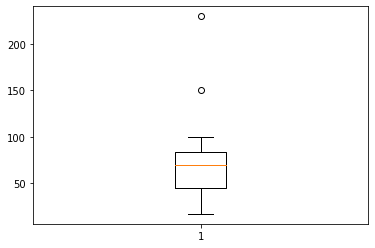

In [22]:
plt.boxplot(sorted_salary)

Найдем значения за пределами "усов"

In [23]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [24]:
outliers = []
for i in sorted_salary:
    if i < boxplot_range[0] or i > boxplot_range[1]:
        outliers.append(i)
print(outliers)

[150, 230]


### Задача 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Используем для решения задачи формулу Байеса.

Определимся что событие $A$ - это сданная сессия. Событие $B_i$ что сдал студент с i-го факультета. Нам надо найти $P(B_i|A)$. По формуле Байеса получаем $P(B_i|A) = \dfrac{P(A|B_i) \cdot P(B_i)}{P(A)}$

Определим вероятность что сессию сдал студент i-го факультета. Т.к. студентов на факультете C в 2 раза больше чем на факультетах A и B, $P(B_A) = P(B_B) = \dfrac{1}{4}$, $P(B_C) = \dfrac{1}{2}$
Вероятности $P(A|B_i)$ нам даны: $P(A|B_A) = 0.8$, $P(A|B_B) = 0.7$, $P(A|B_A) = 0.9$.
Осталось посчитать вероятность сдачи сессии студентами всех факультетов. Воспользуемся формулой полной вероятности.

$$P(A) = P(A|B_A) \cdot P(B_A) + P(A|B_B) \cdot P(B_B) + P(A|B_C) \cdot P(B_C).$$

$$P(A) = 0.8 \cdot \dfrac{1}{4} + 0.7 \cdot \dfrac{1}{4} + 0.9 \cdot \dfrac{1}{2}.$$


In [25]:
p_student = [0.25, 0.25, 0.5]
p_student_done = [0.8, 0.7, 0.9]

In [26]:
P_A = p_student_done[0] * p_student[0] + p_student_done[1] * p_student[1] + p_student_done[2] * p_student[2]
print(P_A)

0.825


Теперь можем посчитать искомые вероятности подставляя значения в формулу.

In [27]:
def bayes(P_A_B, P_B, P_A):
    return (P_A_B * P_B) / P_A

In [28]:
student_a = bayes(p_student_done[0], p_student[0], P_A)
student_b = bayes(p_student_done[1], p_student[1], P_A)
student_c = bayes(p_student_done[2], p_student[2], P_A)
print('Вероятность того что студент, сдавший сессию, учится на факультете A:', student_a)
print('Вероятность того что студент, сдавший сессию, учится на факультете B:', student_b)
print('Вероятность того что студент, сдавший сессию, учится на факультете C:', student_c)

Вероятность того что студент, сдавший сессию, учится на факультете A: 0.24242424242424246
Вероятность того что студент, сдавший сессию, учится на факультете B: 0.21212121212121213
Вероятность того что студент, сдавший сессию, учится на факультете C: 0.5454545454545455
